In [ ]:
# Mrityunjay Kumar #
# Basic Neural Network #

In [18]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import animation

In [25]:
#create data
x = np.random.rand(100).astype(np.float32)
y = x*0.1+0.3

In [20]:
# create tensorflow start structure
# basically this part creates the computational graph but not evaluates the operation

tf.compat.v1.disable_eager_execution()

weights = tf.compat.v1.Variable(tf.compat.v1.random_uniform([1],-1.0,1.0))  #length of weight 1, any random number b/w -1 to 1
biases  = tf.compat.v1.Variable(tf.zeros([1])) #length of bias 1, any random number

y_pred=weights*x + biases  #y which would be predicted

loss = tf.reduce_mean(tf.square(y-y_pred))   #declared the loss function
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.5)   #SGD with learning rate being 0.5
train = optimizer.minimize(loss)   #minimizing the loss using SGD

init = tf.compat.v1.initialize_all_variables() #very important : initializing all variables as soon as the structure is made

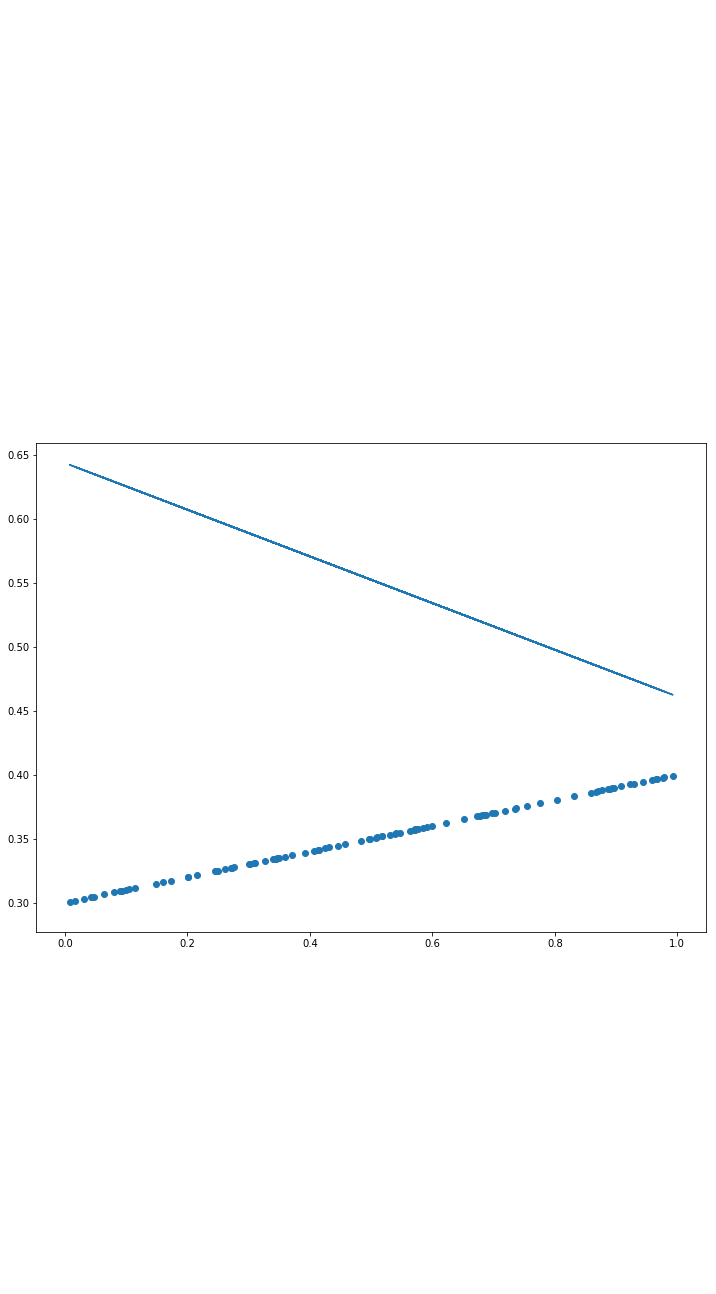

In [31]:
#create tensorflow end structure

sess=tf.compat.v1.Session()   #most important : Session is required to evaluate the steps mapped in the 
                    #computational graph addressing to specific part of the structure
sess.run(init)

fig = plt.figure(figsize=(12,9))
ax  = fig.add_subplot(1,1,1)
plt.xlabel="Independent Variable"
plt.ylabel="Dependent Variable"

def animate(i):
            sess.run(train)
            xvar=x
            yvar=sess.run(weights)*x+sess.run(biases)
            ax.clear()
            plt.scatter(x,y)
            ax.plot(xvar,yvar)

ani=animation.FuncAnimation(fig,animate,interval=500)
plt.show()
            

#for step in range(500): #500 iterations
#    sess.run(train)
#    print(x,sess.run(weights)*x+sess.run(biases))

In [ ]:
# End of Code #